<a href="https://colab.research.google.com/github/Vixuz144/Simulaci-n-2/blob/main/Copia_de_Variable_exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta libreta es para ilustrar como generar variables aleatorias con ciertas distribuciones como la exponencial.

In [36]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from scipy.stats import norm

A continuación se muestran 10 números aleatorios con distro exponencial con parámetro λ = 0.5

In [37]:
n=10
lamda=0.5
L=-1/lamda

In [38]:
for i in range(n):
    u=rnd.random()
    x=L*np.log(u)
    print(x)

0.14996915493139434
3.2736782166177685
0.46251515958537803
4.148115760621131
0.062900519913499
5.179151156588658
5.561465860617334
0.3642334496673728
0.3209165439881023
2.2997478890411016


In [39]:
@jit(nopython = True)
def expo(lamda=1.0,n=10):
    L=-1/lamda
    lista=[]
    for i in range(n):
        u=rnd.random()
        x=L*np.log(u)
        lista.append(x)
    return lista

In [40]:
muestra=expo(0.5,50)

In [41]:
media=np.mean(muestra)

In [42]:
np.var(muestra)

2.3227724948205766

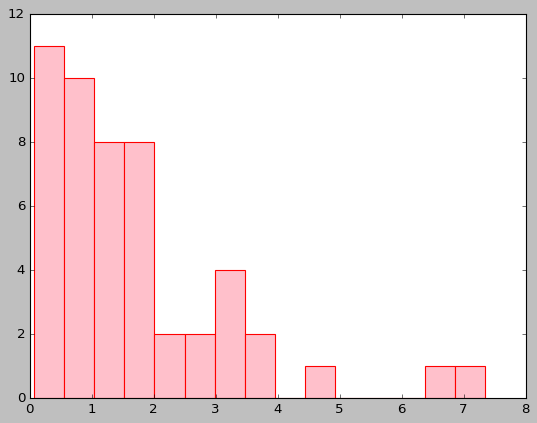

In [43]:
plt.style.use('classic')
plt.hist(muestra, bins = 15, color = 'pink', edgecolor = 'red')
plt.show()

In [44]:
#Para hacer la distribución acumulativa
M=np.sort(muestra)

In [45]:
def cdf(muestra):
    n=len(muestra)
    x=np.sort(muestra)
    y=np.arange(0,n)/n
    return x,y

In [46]:
#print(cdf(muestra))

In [47]:
x_math,y_math= cdf(muestra)

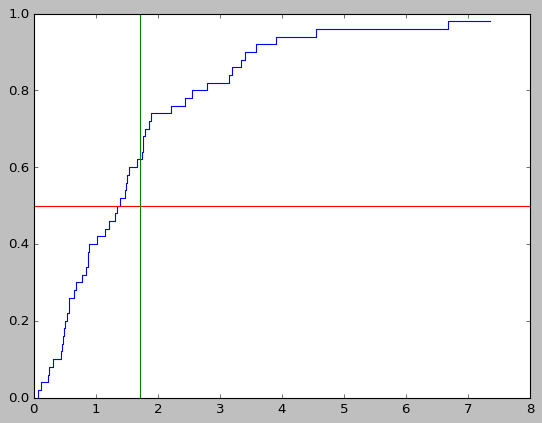

In [48]:
plt.step(x_math,y_math)
plt.axhline(y=0.5, color='red') #La mediana
plt.axvline(x=media,color='green') #La media
plt.show()

Ahora, se va a obtener números aleatorios con función de densidad de probabilidad:

$$ f(x) = \frac{e^x}{e-1} $$

Su función de distribución (cdf) es:
$$ F(x) = ∫_{-∞}^x f(s) ds $$
$$ F(x) = ∫_0^x \frac{e^s}{e-1} ds = \frac{1}{e-1}∫_0^x e^s ds = \frac{1}{e-1}\left[ e^x - e^0 \right] = \frac{e^x-1}{e-1} $$
$$ \therefore F(x) = \frac{e^x-1}{e-1} $$

Así, su función inversa es:

$$F^{-1}(u) = ln(u*(e-1) + 1)$$

In [49]:
@jit(nopython = True)
def distro(n):
  l = []
  for i in range(n):
    l.append(np.log(rnd.random() *(np.e-1) + 1))
  return l

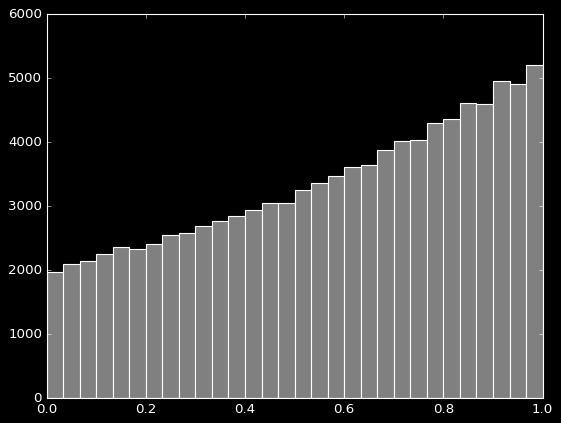

In [50]:
n = 10**5
muestra = distro(n)
med = np.mean(muestra)
var = np.var(muestra, ddof = 1)
plt.style.use('dark_background')
plt.hist(muestra, density = False, bins = 30, color = 'gray', edgecolor = 'white')
plt.show()

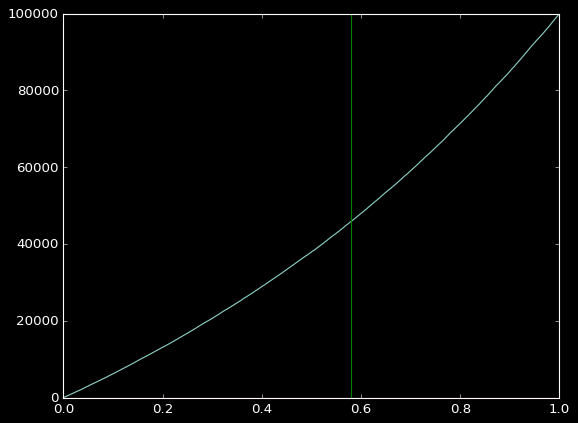

In [51]:
plt.plot(np.sort(muestra), np.arange(len(muestra)))
plt.axhline(med, color='red') #La mediana
plt.axvline(med,color='green')
plt.show()